In [1]:
from pyquery import PyQuery as pq

In [2]:
from lxml import etree

In [3]:
from bs4 import BeautifulSoup

In [4]:
from parsel import Selector

In [33]:
%matplotlib inline

## 测试环境
1. 硬件环境：
    1. 操作系统：Windows7 64
    2. 处理器：Inter(R)Xeon(R) CPU E5-2650 v3
    3. 内存：8G
2. 软件环境：
    1. pyquery:1.2.17
    2. lxml:3.7.3
    3. bs4:4.5.1
    4. parsel:1.1.0

In [5]:
html = u"""
<html>
 <head>
  <base href='http://example.com/' />
  <title>Example website</title>
 </head>
 <body>
  <div id='images'>
   <a href='image1.html'>Name: My image 1 <br /><img src='image1_thumb.jpg' /></a>
   <a href='image2.html'>Name: My image 2 <br /><img src='image2_thumb.jpg' /></a>
   <a href='image3.html'>Name: My image 3 <br /><img src='image3_thumb.jpg' /></a>
   <a href='image4.html'>Name: My image 4 <br /><img src='image4_thumb.jpg' /></a>
   <a href='image5.html'>Name: My image 5 <br /><img src='image5_thumb.jpg' /></a>
  </div>
 </body>
</html>
"""

In [6]:
%timeit -n 10000 pq(html)('title').html()

10000 loops, best of 3: 104 µs per loop


In [7]:
%timeit -n 10000 etree.HTML(html).xpath('//title/text()')

10000 loops, best of 3: 78.5 µs per loop


In [8]:
%timeit -n 10000 BeautifulSoup(html,"lxml").title

10000 loops, best of 3: 795 µs per loop


In [9]:
%timeit -n 10000 BeautifulSoup(html,"html.parser").title

10000 loops, best of 3: 1.04 ms per loop


In [10]:
%timeit -n 10000 BeautifulSoup(html,"html5lib").title

10000 loops, best of 3: 3.62 ms per loop


In [11]:
%timeit -n 10000 Selector(text=html).xpath('//title/text()').extract_first()

10000 loops, best of 3: 192 µs per loop


In [12]:
%timeit -n 10000 Selector(text=html).css('title::text').extract_first()

10000 loops, best of 3: 322 µs per loop


In [22]:
from pandas import Series

In [24]:
s = Series([104,78.5,795,1040,3620,192,322],index=['pq','xpath','bs4_lxml','bs4_html.parser','bs4_html5lib','parsel_xpath','parsel_css'])

In [31]:
s.sort_values(inplace=True)

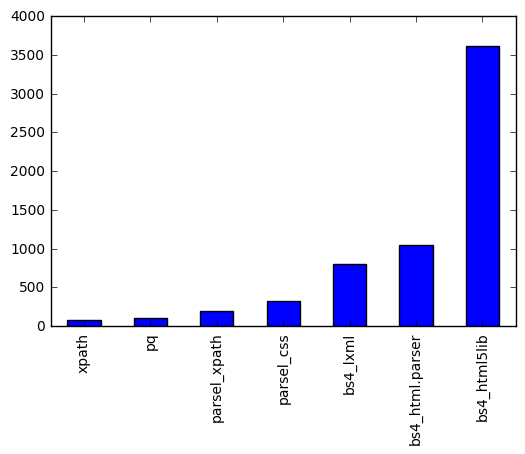

In [34]:
s.plot(kind='bar')